# Introduction
This notebook shows how to evaluate neural cross-lingual summarization (xls) presented in paper [A Deep Reinforced Model for Zero-Shot Cross-Lingual Summarization
with Bilingual Semantic Similarity Rewards](https://arxiv.org/pdf/2006.15454.pdf) . Their original codes are available at [zdou0830/crosslingual_summarization_semantic](https://github.com/zdou0830/crosslingual_summarization_semantic). <br><br>


XLS comes with different models, this notebook demonstrates way to evaluate 'word-level-supervised' models only. Since pinpointing the end of sentences from running Thai text is difficult, we intentionally left 'sent-level-supervised' for future works. 

<br>
Make sure to use GPU runtime if it is available.


In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install -q torch==1.5.1 torchvision==0.6.1
!pip install -q rouge
!pip install -q bert_score

import pandas as pd
from tqdm.notebook import tqdm
import rouge
from bert_score import score

     |████████████████████████████████| 60 kB 4.7 MB/s 
     |████████████████████████████████| 3.4 MB 41.1 MB/s 
     |████████████████████████████████| 596 kB 44.7 MB/s 
     |████████████████████████████████| 61 kB 365 kB/s 
     |████████████████████████████████| 895 kB 43.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.8 MB/s 


In [1]:
!git clone https://github.com/nakhunchumpolsathien/ThaiCrossSum_Corpora
%cd /content/ThaiCrossSum_Corpora/src/XLS

Cloning into 'ThaiCrossSum_Corpora'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 124 (delta 35), reused 121 (delta 35), pack-reused 0
Receiving objects: 100% (124/124), 3.02 MiB | 9.68 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/ThaiCrossSum_Corpora/src/XLS


In [ ]:
import json
config_file = open('/content/crosslingual_summarization_semantic/word-level-supervised/translate.json')
config_info = json.load(config_file)
print('Example of config file')
print(json.dumps(config_info, indent=4, sort_keys=True))

Example of config file
{
    "batch_size": 2000,
    "input": [
        "/content/test.MT.source.TH(EN).txt",
        "/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2en-filtered/xls.test.src"
    ],
    "min_length": 2,
    "model_path": "/content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/xls/th2en/full-dataset/checkpoint-step-990000",
    "mono": false,
    "output": [
        "/content/mt.out",
        "/content/xls.out"
    ],
    "tf": false,
    "vocab": [
        "/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2en-filtered/mt-test.txt",
        "/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2en-filtered/xls.test.src"
    ]
}


In [ ]:
#th2en
!python '/content/ThaiCrossSum_Corpora/src/XLS/word-level-supervised/translate.json' -config '/content/ThaiCrossSum_Corpora/src/XLS/word-level-supervised/translate.json'

2021-12-21 15:22:22,518 - Build dataset...
2021-12-21 15:22:23,166 - Load checkpoint from /content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/xls/th2en/full-dataset/checkpoint-step-990000.
2021-12-21 15:22:25,230 - Build model...
2021-12-21 15:22:32,059 - Start translation...
2021-12-21 15:22:48,046 - Task 1:     333/   3000
2021-12-21 15:22:50,902 - Task 2:       7/   3000
2021-12-21 15:22:59,209 - Task 1:     583/   3000
2021-12-21 15:23:01,938 - Task 2:      14/   3000
2021-12-21 15:23:08,964 - Task 1:     805/   3000
2021-12-21 15:23:13,159 - Task 2:      21/   3000
2021-12-21 15:23:21,471 - Task 1:    1005/   3000
2021-12-21 15:23:24,483 - Task 2:      28/   3000
2021-12-21 15:23:31,782 - Task 1:    1186/   3000
2021-12-21 15:23:34,539 - Task 2:      35/   3000
2021-12-21 15:23:40,896 - Task 1:    1350/   3000
2021-12-21 15:23:44,329 - Task 2:      42/   3000
2021-12-21 15:23:48,970 - Task 1:    1496/   3000
2021-12-21 15:23:51,807 - Task 2:      4

In [ ]:
#th2zh  (reduce batch size to 1000 if it yields 'out-of-memory'.)
!python '/content/ThaiCrossSum_Corpora/src/XLS/word-level-supervised/translate.json' -config '/content/ThaiCrossSum_Corpora/src/XLS/word-level-supervised/translate.json'

2021-12-21 17:10:23,090 - Build dataset...
2021-12-21 17:10:23,730 - Load checkpoint from /content/drive/MyDrive/Final_Datasets/final_crosslingual_sum_datasets/trained_models/xls/th2zh/th2zh-full/checkpoint-step-1500000.
2021-12-21 17:10:25,155 - Build model...
2021-12-21 17:10:31,992 - Start translation...
2021-12-21 17:14:45,085 - Task 1:     250/    611
2021-12-21 17:14:47,080 - Task 2:       4/   3000
2021-12-21 17:14:53,019 - Task 1:     416/    611
2021-12-21 17:14:53,910 - Task 2:       7/   3000
2021-12-21 17:14:56,825 - Task 1:     541/    611
2021-12-21 17:14:58,402 - Task 2:      10/   3000
2021-12-21 17:15:00,817 - Task 1:     605/    611
2021-12-21 17:15:02,374 - Task 2:      13/   3000
2021-12-21 17:15:03,148 - Task 1:     611/    611
2021-12-21 17:15:04,776 - Task 2:      16/   3000
2021-12-21 17:15:05,954 - Task 2:      19/   3000
2021-12-21 17:15:07,487 - Task 2:      22/   3000
2021-12-21 17:15:08,750 - Task 2:      25/   3000
2021-12-21 17:15:09,817 - Task 2:      28

## Outputs Example

In [ ]:
# Body Article
with open("/content/drive/MyDrive/Projects/Model_Checkpoints/XLS/dataset/th2zh-full/test.CLS.source.language1") as file:
    head = list(islice(file, 1))

print(head)

['ประเด็น การ พบ เชื้อ โค วิด - 19 ใน สัตว์ ต่างๆ สวนสัตว์ นิวยอร์ก พบ ใน เสือโคร่ง มลายู ฮ่องกง มี สุนัข 2 ตัว ติดเชื้อ เบลเยียม พบ เชื้อ ใน อุจจาระ และ อาเจียน ของ แมว 1 ตัว และ ล่าสุด พบ แมว อีก 2 ตัว ติดเชื้อ ที่ นิวยอร์ก ส่งผล ให้ มี การ กล่าวขาน อย่าง หนาหู ใน แวด วงสังคม คนรัก สัตว์ เรา และ สัตว์เลี้ยง จะ อยู่ กัน ต่อไป อย่างไร ดี ? สมาคม สัตวแพทย์ ผู้ ประกอบ การบำบัดโรค สัตว์ เล็ก โลก หรือ world small animal veterinary association ( wsava ) ออกโรง ให้ ผู้เลี้ยงสัตว์ สบายใจ ได้ สัตว์ ที่ ติดเชื้อ โค วิด ไม่ สามารถ นำ เชื้อ มา ติด คน หรือ สัตว์ อื่นๆ ได้ มี แต่ คน เท่านั้น ที่ นำ เชื้อ ไป ติด สัตว์ ด้าน วงการ สัตวแพทย์ บ้าน เรา น.สพ. เกษตร สุ เต ชะ จาก มหาวิทยาลัย เกษตรศาสตร์ ออกมา แนะนำ วิธีการ ดูแล สัตว์เลี้ยง ให้ ทั้ง บุคลากร ใน สถานพยาบาล สัตว์ และ เจ้าของ สัตว์เลี้ยง ปัจจุบัน ( เมษายน 63 ) ยัง ไม่ มี การพิสูจน์ ว่า มี การ ติดเชื้อ จาก คน มาสู่ สัตว์ จริง หรือไม่ มี แต่ การศึกษา วิจัย ใน ห้องทดลอง ของ ประเทศ จีน โดย jianzhong shi และ คณะ วิจัย บอ กว่า ได้ ทดลอง ฉีด เชื้อ โค ว

### TH2EN

In [ ]:
from pprint import pprint
from itertools import islice

with open("/content/crosslingual_summarization_semantic/xls.out") as file:
    head = list(islice(file, 1))

pprint(head)

['the issue of covid-19 in various animals the new york zoo found in the south '
 'hong kong tiger with two dogs infected belgium found the infection in the '
 'diarrhea and vomiting of 1 cat and recently found 2 other cats infected in '
 'new york\n']


### TH2ZH

In [ ]:
with open("/content/xls_th2zh.out") as file:
    head = list(islice(file, 1))

pprint(head)

['动物 爱好 者 和 宠物 爱好 者 将 继续 留 在 一起 吗 ？ 兽医 协会 （ <unk> ） 发出 了 一 个 小 世界 动物 主人 ， 让 他们 '
 '更 舒适 地 感染 了 科维 - 19 感 的 动物 。\n']


## Evaluate CLS output results with ROUGE

### TH2EN

In [ ]:
!rouge -f '/content/crosslingual_summarization_semantic/xls.out' '/content/drive/MyDrive/Projects/th-ncls/datasets/th2en/beaver-base/test.eng.ref' --avg

{
  "rouge-1": {
    "r": 0.4469537489350647,
    "p": 0.4346031907276047,
    "f": 0.43298833776974543
  },
  "rouge-2": {
    "r": 0.21402480317110759,
    "p": 0.1970372030914162,
    "f": 0.20151164435816538
  },
  "rouge-l": {
    "r": 0.4142687266547081,
    "p": 0.4019157056635093,
    "f": 0.40097591115768105
  }
}


### TH2ZH

In [ ]:
!rouge -f '/content/xls_th2zh.out' '/content/drive/MyDrive/Projects/Model_Checkpoints/XLS-proposedModel/dataset/th2zh-full/test.CLS.ref.language2' --avg

{
  "rouge-1": {
    "r": 0.4910264228952755,
    "p": 0.5320669205975206,
    "f": 0.5033115944903118
  },
  "rouge-2": {
    "r": 0.2540850048200473,
    "p": 0.2661266129916739,
    "f": 0.2559908895643712
  },
  "rouge-l": {
    "r": 0.4426118349339915,
    "p": 0.47854026379898096,
    "f": 0.4532960921423596
  }
}


## Evaluate CLS output results with BertScore




In [ ]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)
%matplotlib inline

### TH2EN

In [ ]:
with open("/content/crosslingual_summarization_semantic/xls.out") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/Projects/th-ncls/datasets/th2en/beaver-base/test.eng.ref") as f:
    refs = [line.strip() for line in f]

In [ ]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)    #use lang='zh' if evaluate th2zh models

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/94 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/47 [00:00<?, ?it/s]

done in 99.03 seconds, 30.30 sentences/sec


In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")

System level F1 score: 0.882
System level P score: 0.882
System level R score: 0.882


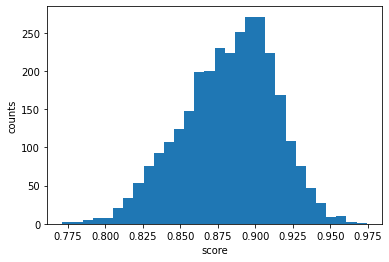

In [ ]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=30)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

### TH2ZH

In [ ]:
with open("/content/xls_th2zh.out") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/Projects/Model_Checkpoints/XLS/dataset/th2zh-full/test.CLS.ref.language2") as f:
    refs = [line.strip() for line in f]

In [ ]:
P, R, F1 = score(cands, refs, lang='zh', verbose=True)    #use lang='zh' if evaluate th2zh models

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/393M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/94 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/47 [00:00<?, ?it/s]

done in 836.97 seconds, 3.58 sentences/sec


In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")

System level F1 score: 0.756
System level P score: 0.763
System level R score: 0.750


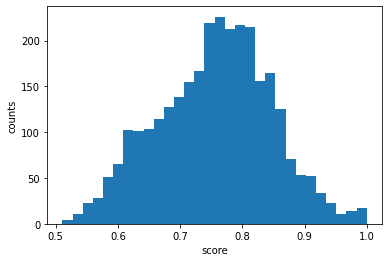

In [ ]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=30)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

## Evaluate MT Results with BLUE score

###  TH2EN

In [ ]:
import nltk
import codecs
from tqdm.notebook import tqdm
import pandas as pd

In [ ]:
def get_text_list(fpath):
  texts = []
  with codecs.open(fpath, encoding='utf-8') as f:
    for line in f:
      text = line.replace('!', '').replace('.', '').replace(',', '').replace('\n', '')
      text = text.replace('，', '').replace('？', '').replace('。', '')
      texts.append(text)
  return texts

In [ ]:
hypos = get_text_list('/content/mt.out')
refs = get_text_list('/content/test.MT.target.EN.txt')

In [ ]:
print(len(hypos))
print(len(refs))

3000
3000


In [ ]:
scores = []
for i in tqdm(range(len(refs))):
  hyp = hypos[i].split()
  ref = refs[i].split()

  scores.append(nltk.translate.bleu_score.sentence_bleu([ref], hyp))

  0%|          | 0/3000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
th2en_mt_output_df = pd.DataFrame(list(zip(refs, hypos, scores)),
               columns =['ref', 'hyp', 'bleu'])

In [ ]:
th2en_mt_output_df.sample(n=10)

,ref,hyp,bleu
1691,this is a great product however it really need...,this is a very excellent bitcoins that just he...,0.164254
1426,you get what you pay for with the pricing and ...,you got what you paid for that price and this ...,0.472871
2621,as far as i know there is no other explanation...,as i know there is no other explanation for th...,0.503192
2649,i'd like another review when he actually gets it,i want to study again when he really received ...,0.386097
349,for about six months after buying it the left ...,after buying about six months the left speaker...,0.401000
524,with all my work gone into photoshop i thought...,my job disappeared in the <unk> my think i use...,0.127438
693,i ordered this for my father who has a bad kne...,i ordered this not to let my father in the kne...,0.230495
1882,like most books lately there are way too many ...,like most books recently have too many characters,0.478797
1027,i bought this cable because the specs on its a...,buy this line because of the details in its am...,0.153069
2557,perhaps i 'm missing something perhaps he 's t...,sometimes i may miss something sometimes he is...,0.272509


In [ ]:
print(f'Average BLEU scores {round(th2en_mt_output_df["bleu"].mean()*100, 2)}')

Average BLEU scores 39.64


### TH2ZH
Note: Tokenized at word level, not character level.

In [ ]:
hypos = get_text_list('/content/mt_th2zh.out')
refs = get_text_list('/content/test.MT.target.ZH.txt')

scores = []
for i in tqdm(range(len(refs))):
  hyp = hypos[i].split()
  ref = refs[i].split()

  scores.append(nltk.translate.bleu_score.sentence_bleu([ref], hyp))

th2zh_mt_output_df = pd.DataFrame(list(zip(refs, hypos, scores)),
               columns =['ref', 'hyp', 'bleu'])

  0%|          | 0/611 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
th2zh_mt_output_df.sample(n=10)

,ref,hyp,bleu
219,今天 天气真好,今天 天气 好,0.759836
81,先生 对 不起,我 很 抱歉 你,0.000000
493,太贵 了,太昂 贵 了 太贵 了,0.562341
444,如果 你们 去 打排 球别 忘 叫 我,如果 一 个 朋友 去 排球 忘记 打电 话 给 我,0.722657
480,泰 语 难 吗,泰语 很 困难 泰 语 很难 吗,0.516973
396,他 是 世界 上 最 快乐 的 人,他 是 世界 上 最 幸福 的 人,0.594604
469,你 会 讲中 文 吗,你 能 在 中国 发言 吗,0.759836
178,人要 衣装,人们 需要 衣服,0.000000
551,你 是 不是 医 生,你 是 医生 吗,0.497609
425,我 要走 了,我 要 走 了,0.840896


In [ ]:
print(f'Average BLEU scores {round(th2zh_mt_output_df["bleu"].mean()*100, 2)}')

Average BLEU scores 51.0
